In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import pickle
from flask import Flask, request, jsonify
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [8]:
df = pd.read_csv("bank.csv")
print(df.head())

   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  


Text(0.5, 1.0, 'After Normalization')

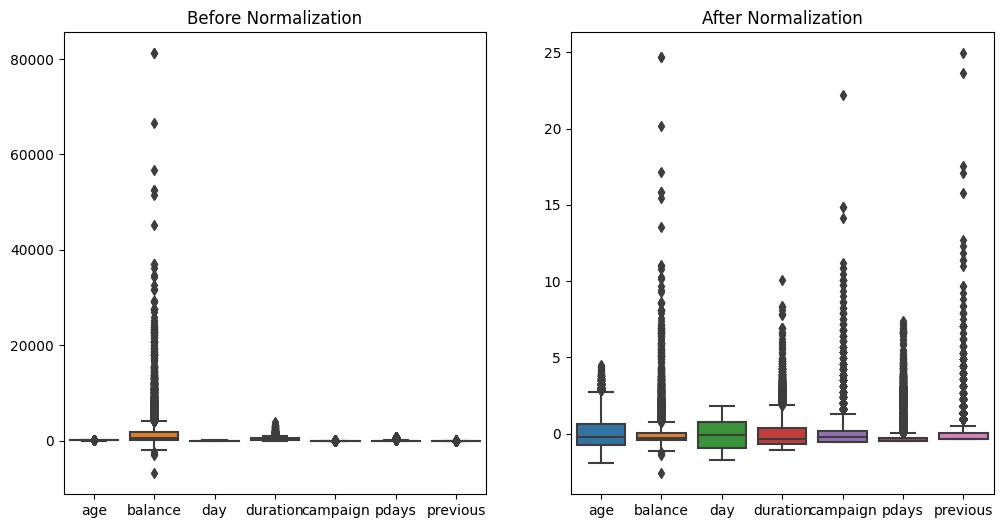

In [9]:
#De features som skall normaliseras
continuous_columns = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]

continuous_df = df[continuous_columns]

scaler = StandardScaler()
normalized_data = scaler.fit_transform(continuous_df)

normalized_df = pd.DataFrame(normalized_data, columns=continuous_columns)
 
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data=continuous_df, ax=axes[0])
sns.boxplot(data=normalized_df, ax=axes[1])
axes[0].set_title("Before Normalization")
axes[1].set_title("After Normalization")

In [10]:
# Dessa features skall få ett numeriskt värde då dom inte har det från början.
categorical_columns = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome", "deposit"]
categorical_df = df[categorical_columns]

combined_df = pd.concat([normalized_df, categorical_df], axis=1)

le = LabelEncoder()
 
for column in categorical_columns:
    if not pd.api.types.is_numeric_dtype(combined_df[column]):
        combined_df[column] = le.fit_transform(combined_df[column])

print(combined_df.head())

        age   balance       day  duration  campaign     pdays  previous  job  \
0  1.491505  0.252525 -1.265746  1.930226 -0.554168 -0.481184  -0.36326    0   
1  1.239676 -0.459974 -1.265746  3.154612 -0.554168 -0.481184  -0.36326    0   
2 -0.019470 -0.080160 -1.265746  2.929901 -0.554168 -0.481184  -0.36326    9   
3  1.155733  0.293762 -1.265746  0.596366 -0.554168 -0.481184  -0.36326    7   
4  1.071790 -0.416876 -1.265746  0.867171 -0.186785 -0.481184  -0.36326    0   

   marital  education  default  housing  loan  contact  month  poutcome  \
0        1          1        0        1     0        2      8         3   
1        1          1        0        0     0        2      8         3   
2        1          1        0        1     0        2      8         3   
3        1          1        0        1     0        2      8         3   
4        1          2        0        0     0        2      8         3   

   deposit  
0        1  
1        1  
2        1  
3        1  
4  

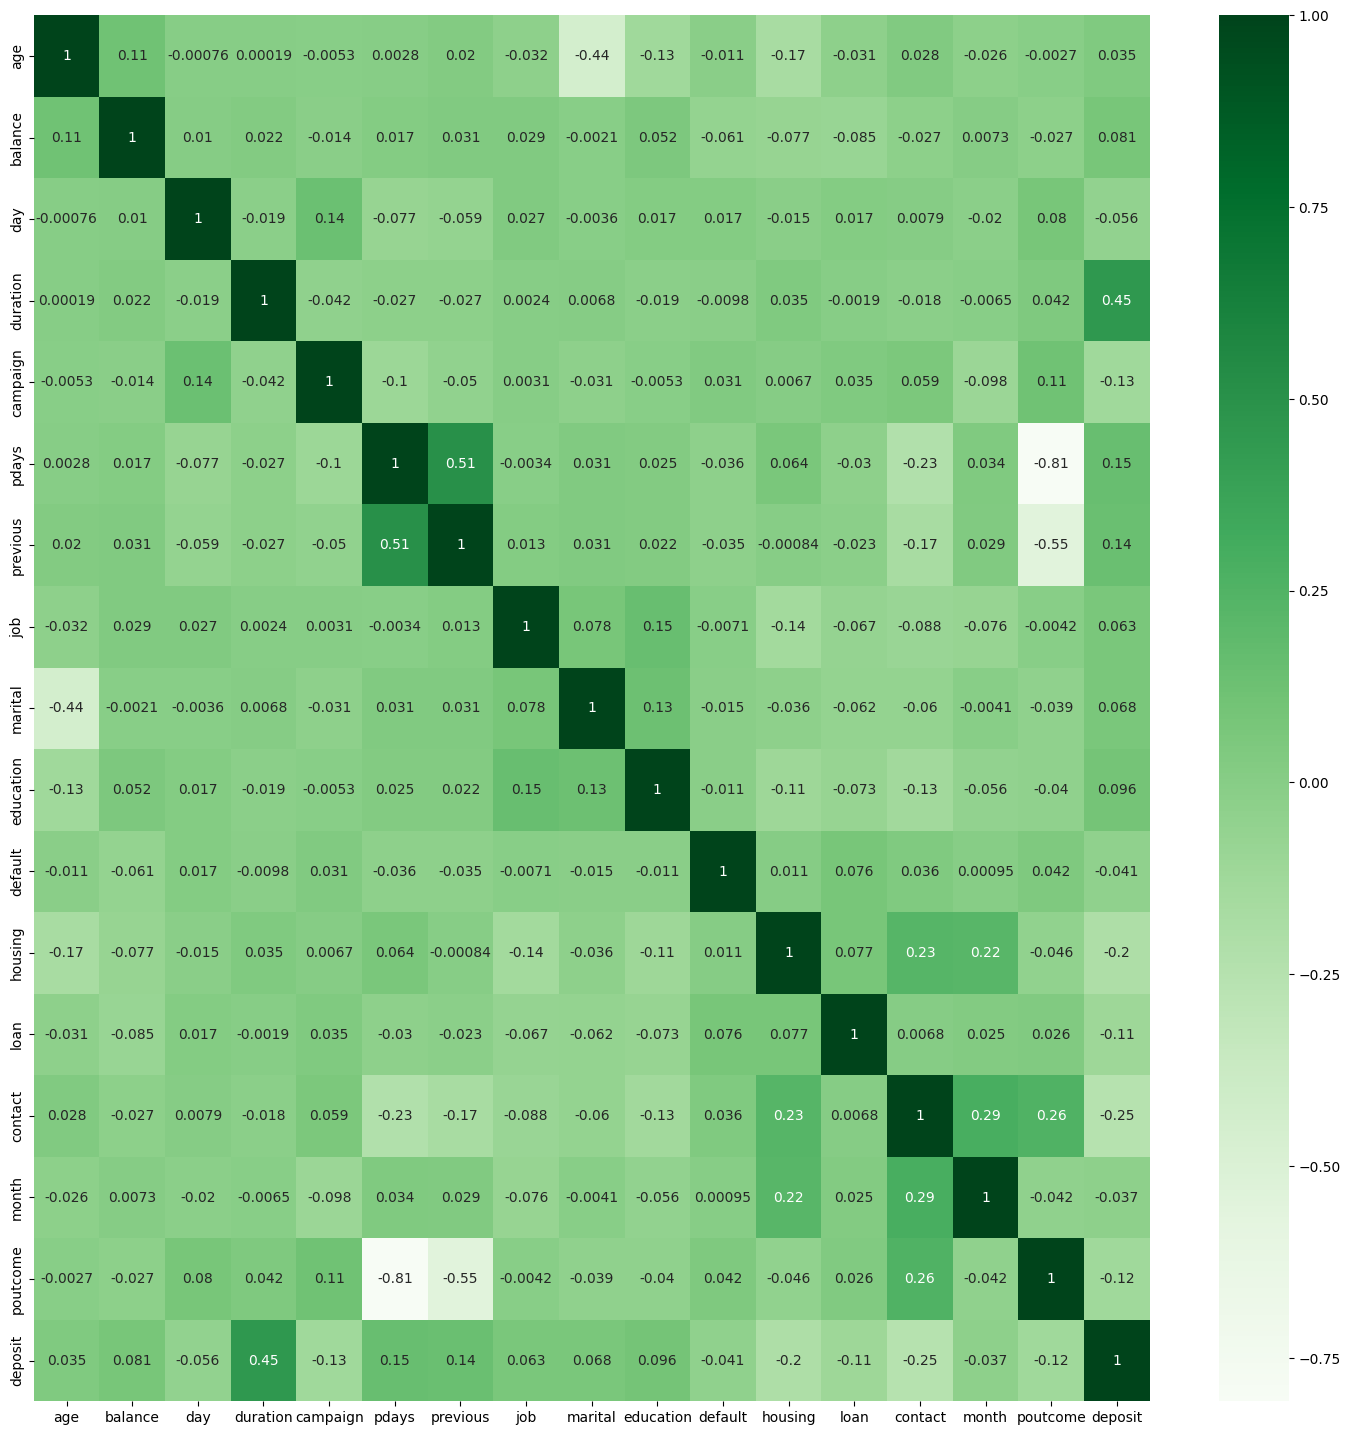

In [11]:
plt.figure(figsize=(18,18))
sns.heatmap(combined_df.corr(), annot=True, cmap="Greens")
plt.show()

In [12]:
x = combined_df.drop("deposit", axis=1)
y = combined_df["deposit"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [13]:
rfc = RandomForestClassifier(n_estimators=500)
start_time = time.time()
rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
end_time = time.time()
total_time = end_time - start_time

print("Total tid: ", total_time, " sekunder")

Accuracy: 0.8405494177366378
Total tid:  5.152601718902588  sekunder


In [15]:
app = Flask(__name__)

@app.route("/bank", methods = ["POST"])
def send_data(): 
    json_ = request.json 
    query_df = pd.DataFrame(json_)
    prediction = model.predict(query_df)
    return jsonify({"Prediction": prediction.tolist()})

if __name__ == "__main__":
    app.run(debug=False)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


In [16]:
#Testa rfc med k-fold
rfc = RandomForestClassifier(n_estimators=500) 
start_time = time.time()
#gnb = GaussianNB()
#knn = KNeighborsClassifier(n_neighbors=5)
kf = KFold(n_splits=5, shuffle = True, random_state=42)

scores = cross_val_score(rfc,x,y,cv=kf, scoring="accuracy")
end_time = time.time()
total_time = end_time - start_time


print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("Total tid: ", total_time, " sekunder")

Accuracy: 0.85 (+/- 0.02)
Total tid:  29.087615966796875  sekunder


In [17]:
knn = KNeighborsClassifier(n_neighbors=5)
start_time = time.time()

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
end_time = time.time()
total_time = end_time - start_time

print("Total tid: ", total_time, " sekunder")

Accuracy: 0.7966557181248134
Total tid:  0.17954444885253906  sekunder


In [18]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
start_time = time.time()

gnb.fit(x_train, y_train)


y_pred = gnb.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy) 
end_time = time.time()
total_time = end_time - start_time

print("Total tid: ", total_time, " sekunder")

Accuracy: 0.7446999104210212
Total tid:  0.005496501922607422  sekunder
